In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
from visualizer import Visualizer
visualizer = Visualizer()

In [3]:
dataframe = pd.read_csv("../clustering_diabetesdata.csv")

In [4]:
dataframe.describe()

Numb_of_Times_Preg  PlasmaglucoseConcentration  BloodPressure  \
count          768.000000                  768.000000     768.000000   
mean             3.845052                  120.894531      69.105469   
std              3.369578                   31.972618      19.355807   
min              0.000000                    0.000000       0.000000   
25%              1.000000                   99.000000      62.000000   
50%              3.000000                  117.000000      72.000000   
75%              6.000000                  140.250000      80.000000   
max             17.000000                  199.000000     122.000000   

       SkinFoldThickness  SerumInsulin         BMI  DiabetesPedigreeFunction  \
count         768.000000    768.000000  768.000000                768.000000   
mean           20.536458     79.799479   31.992578                  0.471876   
std            15.952218    115.244002    7.884160                  0.331329   
min             0.000000      0.000000    0.000000                  0.078000   
25%             0.000000      0.000000   27.300000                  0.243750   
50%            23.000000     30.500000   32.000000                  0.372500   
75%            32.000000    127.250000   36.600000                  0.626250   
max            99.000000    846.000000   67.100000                  2.420000   

              Age  
count  768.000000  
mean    33.240885  
std     11.760232  
min     21.000000  
25%     24.000000  
50%     29.000000  
75%     41.000000  
max     81.000000

In [5]:
dataframe.head()

Numb_of_Times_Preg  PlasmaglucoseConcentration  BloodPressure  \
0                   6                         148             72   
1                   1                          85             66   
2                   8                         183             64   
3                   1                          89             66   
4                   0                         137             40   

   SkinFoldThickness  SerumInsulin   BMI  DiabetesPedigreeFunction  Age  
0                 35             0  33.6                     0.627   50  
1                 29             0  26.6                     0.351   31  
2                  0             0  23.3                     0.672   32  
3                 23            94  28.1                     0.167   21  
4                 35           168  43.1                     2.288   33

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numb_of_Times_Preg          768 non-null    int64  
 1   PlasmaglucoseConcentration  768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinFoldThickness           768 non-null    int64  
 4   SerumInsulin                768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<AxesSubplot: title={'center': 'Correlation matrix'}>

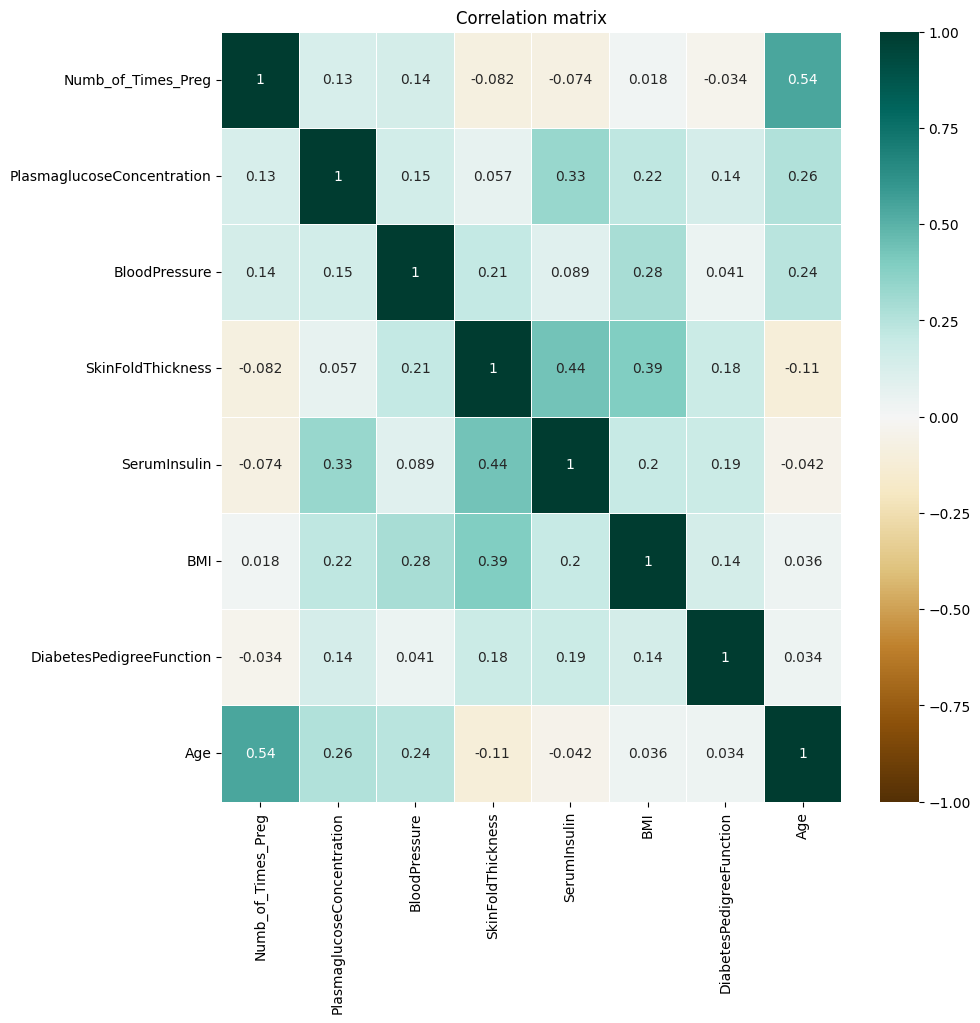

In [7]:
visualizer.corr_heatmap(data=dataframe)

In [9]:
def mean_normalize(data: pd.DataFrame) -> pd.DataFrame:
    normalized_df = (data - data.mean()) / data.std()
    return normalized_df

dataframe = mean_normalize(data=dataframe)

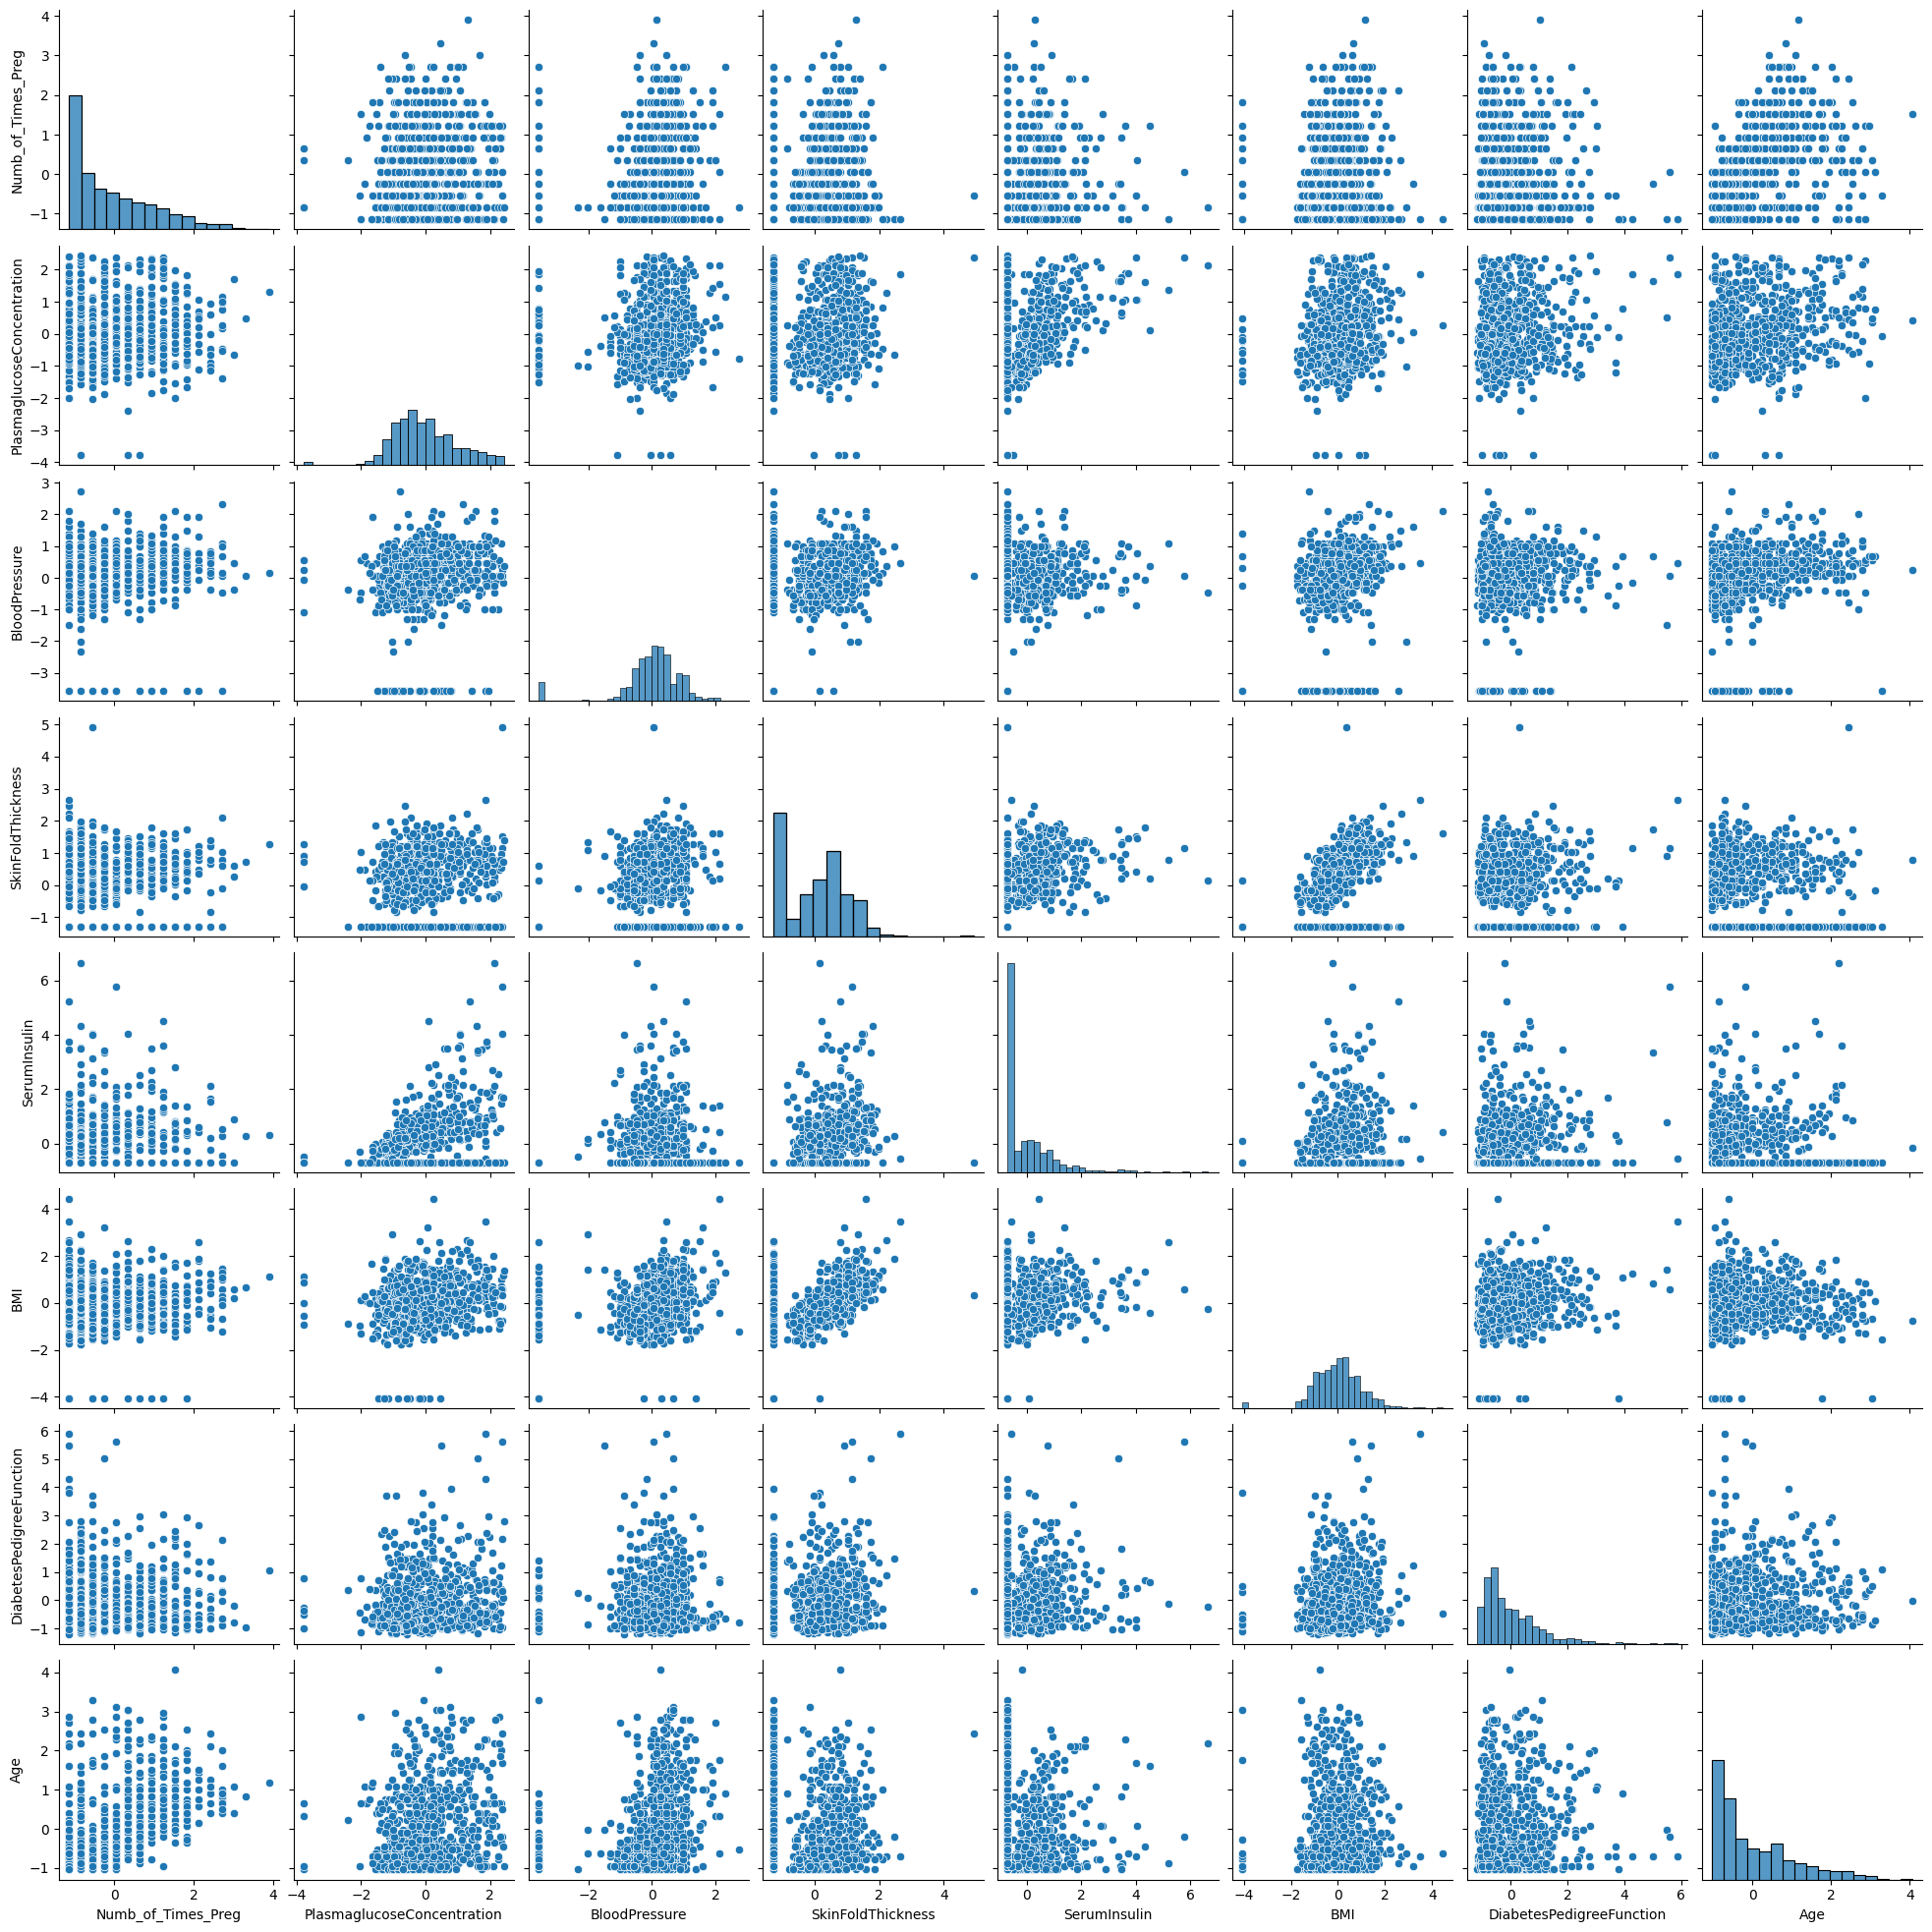

In [11]:
sns.pairplot(data=dataframe)

# KMeans

In [30]:
from sklearn.cluster import KMeans

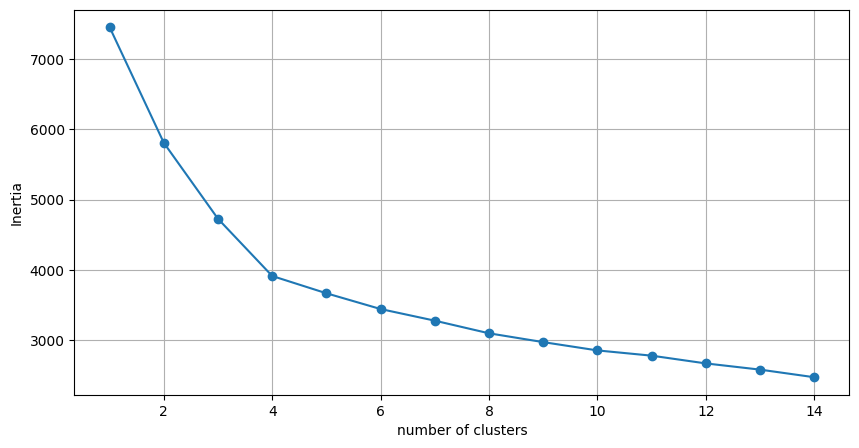

In [31]:
def find_optimal_k_means(data, max = 15):
    means = []
    inertias = []

    for i in range(1, max):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)

        means.append(i)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    
find_optimal_k_means(dataframe)

# Looks like 4 is a good starting point.

In [57]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [58]:
kmeans.fit(dataframe)

KMeans(n_clusters=4, random_state=42)

In [78]:
dataframe['cluster'] = kmeans.labels_

In [79]:
dataframe.head()

Numb_of_Times_Preg  PlasmaglucoseConcentration  BloodPressure  \
0            0.639530                    0.847771       0.149543   
1           -0.844335                   -1.122665      -0.160441   
2            1.233077                    1.942458      -0.263769   
3           -0.844335                   -0.997558      -0.160441   
4           -1.141108                    0.503727      -1.503707   

   SkinFoldThickness  SerumInsulin       BMI  DiabetesPedigreeFunction  \
0           0.906679     -0.692439  0.203880                  0.468187   
1           0.530556     -0.692439 -0.683976                 -0.364823   
2          -1.287373     -0.692439 -1.102537                  0.604004   
3           0.154433      0.123221 -0.493721                 -0.920163   
4           0.906679      0.765337  1.408828                  5.481337   

        Age  cluster  
0  1.425067        3  
1 -0.190548        0  
2 -0.105515        3  
3 -1.040871        0  
4 -0.020483        1

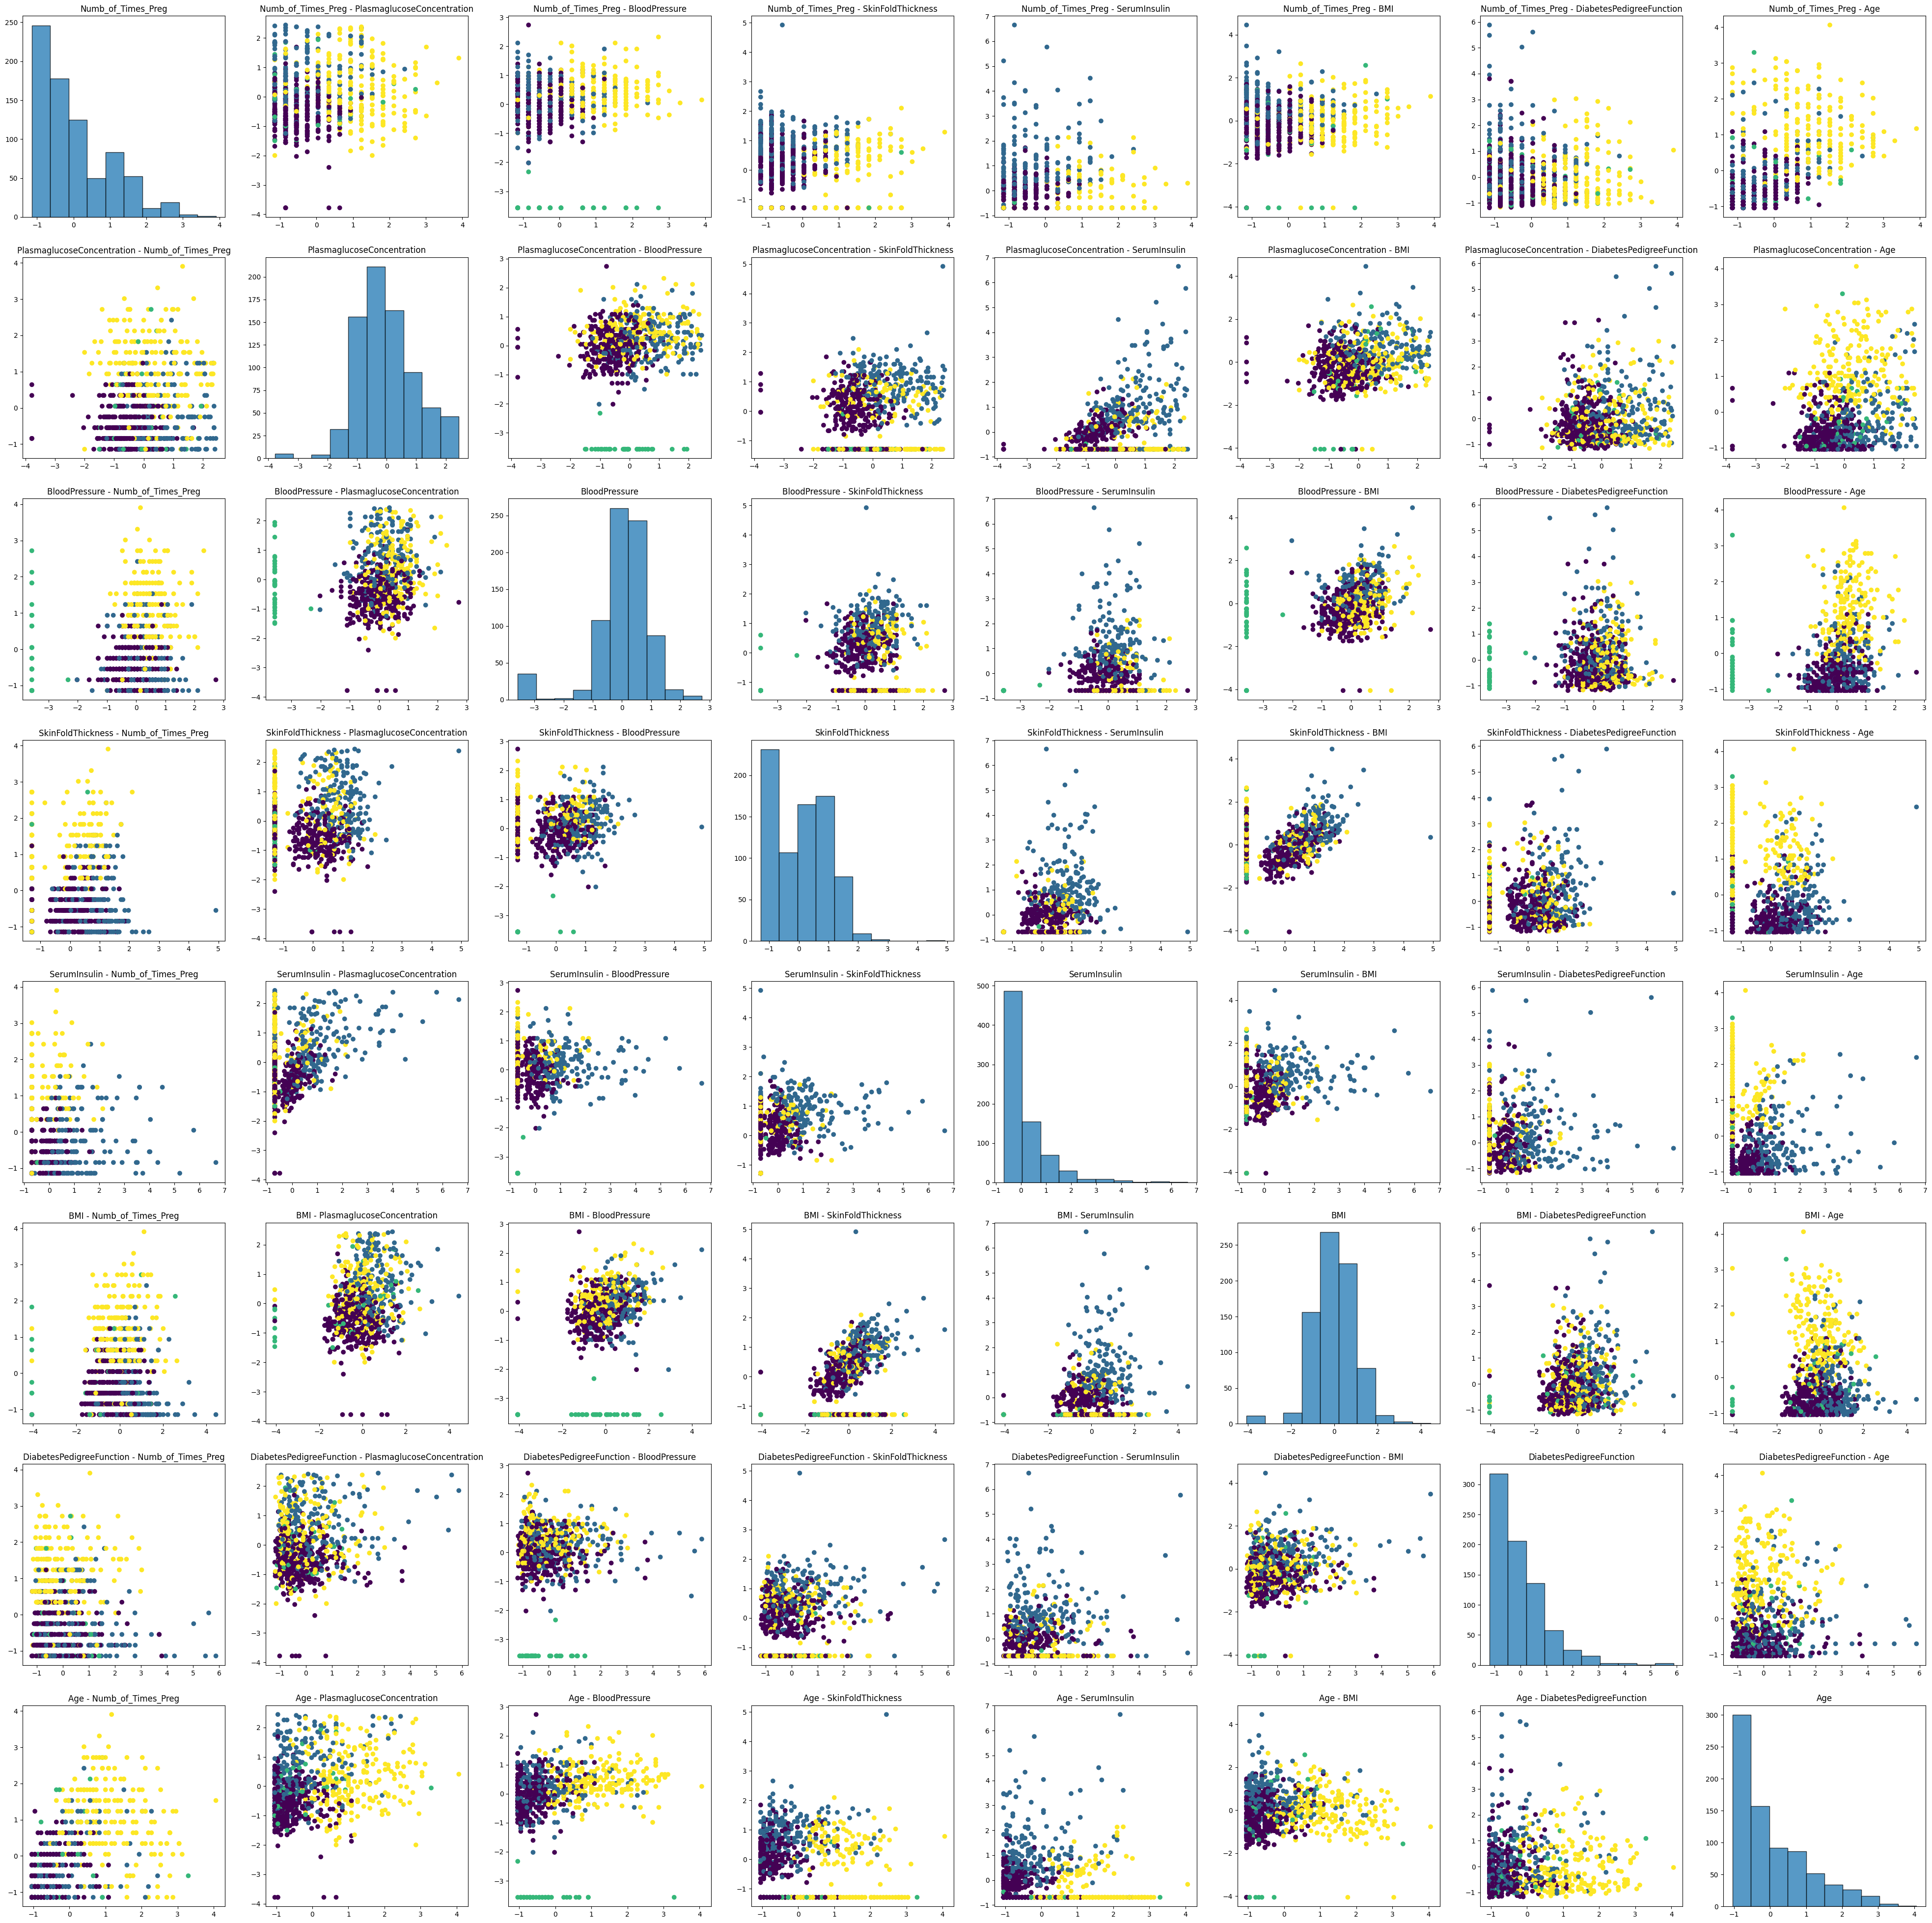

In [93]:
fig, ax = plt.subplots(8, 8, figsize=(50, 50))
for indexI, i in enumerate(dataframe.columns):
    if i == 'cluster':
        continue

    for indexJ, j in enumerate(dataframe.columns):
        if i == j:
            ax[indexI, indexJ].set_title(i)
            ax[indexI, indexJ].hist(dataframe[i], bins=10, edgecolor='black',
                 alpha=0.75, range=[dataframe[i].min(), dataframe[i].max()])
            continue

        if j == 'cluster':
            continue
        

        ax[indexI, indexJ].scatter(x=dataframe[i], y=dataframe[j], c=dataframe['cluster'])
        ax[indexI, indexJ].set_title(f'{i} - {j}')